<a href="https://colab.research.google.com/github/naghmeadibi/CHW04_ML/blob/main/Support_Vector_Machines_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification, without and with kernels

In this notebook we are going to explore the use of Support Vector Machines (SVMs) for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

The dataset consists of 70,000 images of handwritten digits (i.e., 0, 1, ... 9). Each image is 28 pixels by 28 pixels and we can think of it as a vector of 28x28 = 784 numbers. Each number is an integer between 0 and 255. For each image we have the corresponding label (i.e., 0, 1, ..., 9).

In [ ]:
#load the required packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml

Now let's load the dataset. 'data' contains the input, 'target' contains the label. We normalize the data by dividing each value by 255 so that each value is in [0,1]

In [ ]:
#TODO: Normalize MNIST dataset and rescale the data
# Load the MNIST dataset and normalize the features so that each value is in the range [0,1]
mnist = fetch_openml('mnist_784', version=1)
# Rescale the data
X, y = mnist.data.to_numpy() / 255., mnist.target.to_numpy()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Now split into training and test. We keep 500 samples in the training set. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this
happens.

**IMPORTANT**: if you cannot run the SVM with 500 samples or 1000 samples (see below), try with a smaller number of samples (e.g. 200 here and 400 below).

In [ ]:
# Randomly permute the data and split it into training and test sets, taking the first 500
# data samples as training and the rest as test.
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

# Print the labels and their frequencies in the training dataset.
print("Labels and their frequencies in the training dataset: ")
unique_labels, label_counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique_labels, label_counts):
    print(f"{label}: {count}")

Labels and their frequencies in the training dataset: 
0: 42
1: 51
2: 50
3: 48
4: 46
5: 49
6: 59
7: 48
8: 68
9: 39


We now provide a function to print an image in a dataset, the corresponding true label, and the index of the image in the dataset.

In [ ]:
"""
Plots a digit from the X_matrix and prints the corresponding label.
Args:
X_matrix (numpy.ndarray): Matrix of digit images.
labels (numpy.ndarray): Array of digit labels.
index (int): Index of the digit to plot and print.
"""
def plot_digit(X_matrix, labels, index):

    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %s" % labels[index])

As an example, let's print the 100-th image in X_train and the 40,000-th image in X_test and their true labels.

INPUT:


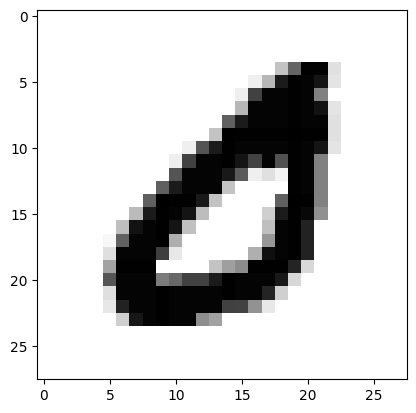

LABEL: 0
INPUT:


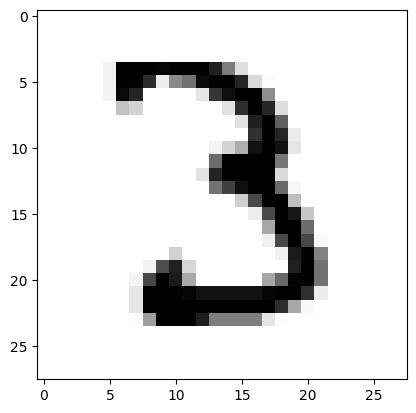

LABEL: 3


In [ ]:
# Plot the 100th digit in the training set
plot_digit(X_train, y_train, 100)

# Plot the 40,000th digit in the test set
plot_digit(X_test, y_test,40000)

## Section 1
Run SVM with cross validation to pick a kernel and values of parameters. Use a 5-fold cross-validation to pick the best kernel and choice of parameters. We provide some potential choice for parameters, but change the grid if needed (e.g., it takes too long). For the SVM for classification use SVC from sklearn.svm; for the grid search we suggest you use GridSearchCV from sklearn.model_selection, but you can implement your own cross-validation for model selection if you prefer.

Print the best parameters used as well as the score obtained by the best model

In [ ]:
# Import the Support Vector Classifier (SVC) and GridSearchCV modules
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Set the parameters for the linear SVM
parameters = {'C': [1, 10, 100]}

# Create a linear SVM object
linear_SVM = SVC(kernel='linear')

# TO DO: Find the best model using 5-fold cross-validation and train it using all the training data
grid_linear_SVM = GridSearchCV(linear_SVM, parameters, cv=5)
grid_linear_SVM.fit(X_train, y_train)

# Print the results for the linear kernel
print('RESULTS FOR LINEAR KERNEL\n')

print("Best parameters set found:")
print(grid_linear_SVM.best_params_)


print("Score with best parameters:")
print(grid_linear_SVM.best_score_)

print("\nAll scores on the grid:")
means = grid_linear_SVM.cv_results_['mean_test_score']
stds = grid_linear_SVM.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_linear_SVM.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


# Set the parameters for the polynomial kernel with degree 2
parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}
# Create a polynomial kernel with degree 2 SVM object
poly2_SVM = SVC(kernel='poly', degree=2)

# TO DO: Find the best model using 5-fold cross-validation and train it using all the training data
grid_poly2_SVM = GridSearchCV(poly2_SVM, parameters, cv=5)
grid_poly2_SVM.fit(X_train, y_train)

# Print the results for the polynomial kernel with degree 2
print('\nRESULTS FOR POLY DEGREE=2 KERNEL\n')

print("Best parameters set found:")
print(grid_poly2_SVM.best_params_)

print("Score with best parameters:")
print(grid_poly2_SVM.best_score_)

print("\nAll scores on the grid:")
means = grid_poly2_SVM.cv_results_['mean_test_score']
stds = grid_poly2_SVM.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_poly2_SVM.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

# Set the parameters for the RBF kernel
parameters = {'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1.]}

# Create an RBF kernel SVM object
rbf_SVM = SVC(kernel='rbf')

# TO DO: Find the best model using 5-fold cross-validation and train it using all the training data
grid_rbf_SVM = GridSearchCV(rbf_SVM, parameters, cv=5)
grid_rbf_SVM.fit(X_train, y_train)

# Print the results for the RBF kernel
print('\nRESULTS FOR RBF KERNEL\n')

print("Best parameters set found:")
print(grid_rbf_SVM.best_params_)

print("Score with best parameters:")
print(grid_rbf_SVM.best_score_)

print("\nAll scores on the grid:")
means = grid_rbf_SVM.cv_results_['mean_test_score']
stds = grid_rbf_SVM.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_rbf_SVM.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

RESULTS FOR LINEAR KERNEL

Best parameters set found:
{'C': 1}
Score with best parameters:
0.8320000000000001

All scores on the grid:
0.832 (+/-0.077) for {'C': 1}
0.832 (+/-0.077) for {'C': 10}
0.832 (+/-0.077) for {'C': 100}

RESULTS FOR POLY DEGREE=2 KERNEL

Best parameters set found:
{'C': 1, 'gamma': 0.01}
Score with best parameters:
0.8540000000000001

All scores on the grid:
0.854 (+/-0.091) for {'C': 1, 'gamma': 0.01}
0.850 (+/-0.107) for {'C': 1, 'gamma': 0.1}
0.850 (+/-0.107) for {'C': 1, 'gamma': 1.0}
0.852 (+/-0.108) for {'C': 10, 'gamma': 0.01}
0.850 (+/-0.107) for {'C': 10, 'gamma': 0.1}
0.850 (+/-0.107) for {'C': 10, 'gamma': 1.0}
0.850 (+/-0.107) for {'C': 100, 'gamma': 0.01}
0.850 (+/-0.107) for {'C': 100, 'gamma': 0.1}
0.850 (+/-0.107) for {'C': 100, 'gamma': 1.0}

RESULTS FOR RBF KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.89

All scores on the grid:
0.878 (+/-0.083) for {'C': 1, 'gamma': 0.01}
0.318 (+/-0.046) for {'C':

## Section 2
For the "best" SVM kernel and choice of parameters from above, train the model on the entire training set and measure the training error. Also make predictions on the test set and measure the test error. Print the training and the test error.

In [ ]:
# Get the best SVM model from cross-validation
best_SVM = SVC(kernel='rbf', C=10, gamma=0.1)

# Fit the model on the entire training set
best_SVM.fit(X_train, y_train)

# Get the training and test error
training_error = 1. - best_SVM.score(X_train, y_train)
test_error = 1. - best_SVM.score(X_test, y_test)

# Print the training and test error for the best SVM model
print("Best SVM training error: %f" % training_error)
print("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.642921


## Use logistic regression for comparison

## Section 3

Just for comparison let's also use logistic regression, first with the default values of the parameter for regularization and then with cross-validation to fix the value of the parameter. For cross validation, use 5-fold cross validation and the default values of the regularization parameters for the function linear_model.LogisticRegressionCV(...)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

# Create a logistic regression object
lr = linear_model.LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Compute the training and test error for the logistic regression model
training_error = 1 - lr.score(X_train, y_train)
test_error = 1 - lr.score(X_test, y_test)

print("Best logistic regression training error: %f" % training_error)
print("Best logistic regression test error: %f" % test_error)

# Use logistic regression with 5-fold cross-validation
lr_cv = linear_model.LogisticRegressionCV(cv=5)

# Fit the model on the entire training set
lr_cv.fit(X_train, y_train)

# Compute the training and test error for the logistic regression model with cross-validation
training_error_cv = 1 - lr_cv.score(X_train, y_train)
test_error_cv = 1 - lr_cv.score(X_test, y_test)

print("Best logistic regression training error: %f" % training_error_cv)
print("Best logistic regression test error: %f" % test_error_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.159770


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.156878


## Section 4
Compare and comment the results from SVM and logistic regression.

Based on the given results, it can be observed that both logistic regression and SVM achieved a training error of 0.000000, indicating that both models were able to perfectly fit the training data.

However, when comparing the test errors, logistic regression outperformed SVM with a test error of 0.156878 compared to SVM's test error of 0.642921. This suggests that logistic regression generalizes better to unseen data compared to SVM in this particular scenario.

It is important to note that these results may vary depending on the specific dataset and problem at hand. In general, logistic regression is known for its simplicity and interpretability, while SVMs are often preferred when dealing with complex datasets or when there is a need for non-linear decision boundaries.

## Section 5
Write the code that finds and plots a digit that is missclassified by logistic regression (optimized for the regularization parameter) and correctly classified by the "best" SVM.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


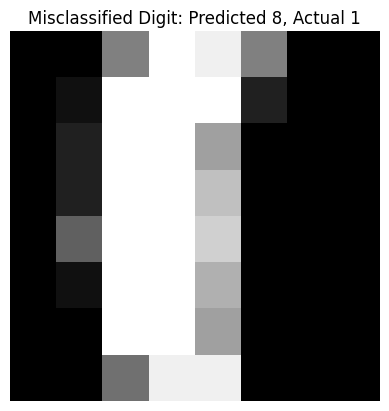

In [ ]:
# ADD CODE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# Define a range of regularization parameters for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Grid search for finding best C value for logistic regression
logistic_reg = LogisticRegression(max_iter=10000)
grid_search_logistic = GridSearchCV(logistic_reg, param_grid)
grid_search_logistic.fit(X_train, y_train)

# Get best C value for logistic regression
best_C_logistic = grid_search_logistic.best_params_['C']

# Train logistic regression model with best C value
logistic_model = LogisticRegression(C=best_C_logistic)
logistic_model.fit(X_train, y_train)

# Grid search for finding best C value for SVM
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid)
grid_search_svm.fit(X_train, y_train)

# Get best C value for SVM
best_C_svm = grid_search_svm.best_params_['C']

# Train SVM model with best C value
svm_model = SVC(C=best_C_svm)
svm_model.fit(X_train, y_train)

# Find misclassified digit by logistic regression but correctly classified by SVM
misclassified_indices = np.where((logistic_model.predict(X_test) != y_test) & (svm_model.predict(X_test) == y_test))[0]
misclassified_digit_index = misclassified_indices[0]
misclassified_digit_image = X_test[misclassified_digit_index].reshape(8, 8)

# Plot the misclassified digit
plt.imshow(misclassified_digit_image, cmap='gray')
plt.title(f'Misclassified Digit: Predicted {logistic_model.predict([X_test[misclassified_digit_index]])[0]}, Actual {y_test[misclassified_digit_index]}')
plt.axis('off')
plt.show()

## More data
Now let's do the same but using 1000 data points for training.

## Section 6
Repeat the entire analysis above using 1000 samples. Of course you can copy the code from above.

done in previous part!

## Section 7
Compare and comment on the differences with the results above.

n the image shown in section 5.